# ABSTRACT


Este notebook busca investigar la relación entre la edad de los solicitantes de crédito y las características de los créditos otorgados, específicamente el valor y la duración del crédito. Utilizando un dataset detallado de una institución financiera, que incluye datos de 1000 solicitantes, se analiza cómo las variaciones en la edad afectan el monto y el plazo de los créditos concedidos. Para la revisión y análisis de datos vamos a estar utilizando las bibliotecas matplotlib y seaborn, para representar gráficamente estas relaciones y detectar patrones. La hipótesis principal es que a menor edad, el valor del crédito otorgado tiende a ser menor y la duración del crédito es más corta. Creemos que esto puede darse ya que a menor edad el historial de créditos y desde ya los ingresos de los solicitantes son menores teniendo una relación directamente proporcional al valor que se otorga, es decir: a menos edad, menos dinero en concepto de credito van a poder acceder.

Para poder comprobarlo vamos a usar scartterplot, boxplot e histogramas, vamos a buscar entender como se comportan las curvas de los histogramas. Adicionalmente el describe y hacer foco en los percentiles, nos va a ayudar a comprobar o refutar nuestra hipótesis.


Definición del Objetivo
Objetivo General: El objetivo de este análisis es investigar la relación entre la edad de los solicitantes y las características de los créditos otorgados, haciendo énfasis en particular en identificar patrones que podrían indicar decisiones de crédito basadas en la edad.
Hipótesis: Nuestra Hipótesis consiste en que a menor edad, el crédito otorgado es de menor valor y, por ende, de menor duración.
2. Contexto Comercial
Descripción del Negocio: En este trabajo exploramos el funcionamiento del sector financiero enfocado específicamente en el área crediticia para las personas físicas.
A la hora de evaluar el otorgamiento de un crédito se requieren evaluaciones rigurosas de la posibilidad de retorno del dinero y ganancias, así como evitar los potenciales fraudes que se puedan generar. En este punto evaluar entre otras cosas el rango etáreo de los solicitantes es de suma importancia para entender la mediana de los casos, y la toma de decisiones en cuanto al monto y riesgo de recuperación del dinero
A través del dataset obtenido buscamos orientar la toma de decisiones a definir qué tipo de préstamos se pueden otorgar de acuerdo a las edades en cuanto a monto y tiempo máximo para la cancelación total del mismo.
3. Contexto Analítico
El dataset incluye datos de 1000 solicitantes. Cuenta con 20 columnas que describen:
checking_status
duration
credit_history
purpose
credit_amount
savings_status
employment
installment_commitment
personal_status
other_parties
residence_since
property_magnitude
age
other_payment_plans
housing
existing_credits
job
num_dependents
own_telephone
foreign_worker
class
4. EDA (RESUMEN)
Como parte del EDA en base a la revisión de datos:
-  No tenemos datos nulos
- Como parte de la primera observación inicial mediante las funciones .info, .describe, .head hicimos un primer análisis de la composición de los datos que ofrecía el data set.
- Como segunda observación mediante las columnas que vimos más relevante de cara nuestros objetivos tomamos: - edad, -duración de credito, -monto del crédito y realizamos gráficos de boxplot, histogramas, y scatterplots.
- Como disclaimer: Observamos outliers en las edades que podría ser un error en la base de datos, pero tomamos la decisión de no inferir que son correctos o filtrarlos. Intentaremos trabajar en métodos robustos tal como lo da una mediana.


Dado que se trata de un dataset chico, y con algunos outliers, varias variables categorícas, pero donde principalmente voy a estar mirando la relación entre floats, creo que es importante usar una regresión robusta

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
!pip install scikit-learn
import sklearn as sk

credits = fetch_openml(name="credit-g", as_frame=True)
df = credits.frame

print(df.head())

  checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

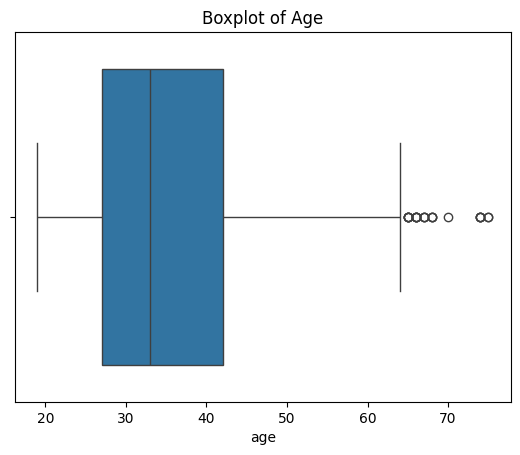

In [5]:
#Reviso outliers de edad

sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")
plt.show()

In [6]:
# Contar valores nulos en cada columna
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("Datos faltantes en cada columna")
print(missing_data)

Datos faltantes en cada columna
Series([], dtype: int64)


Todos los valores en el DataFrame están completos y no hay datos faltantes

In [7]:
# Ver estadísticas descriptivas para algunas variables numéricas
print(df[['credit_amount', 'duration', 'age']].describe())

       credit_amount     duration          age
count    1000.000000  1000.000000  1000.000000
mean     3271.258000    20.903000    35.546000
std      2822.736876    12.058814    11.375469
min       250.000000     4.000000    19.000000
25%      1365.500000    12.000000    27.000000
50%      2319.500000    18.000000    33.000000
75%      3972.250000    24.000000    42.000000
max     18424.000000    72.000000    75.000000


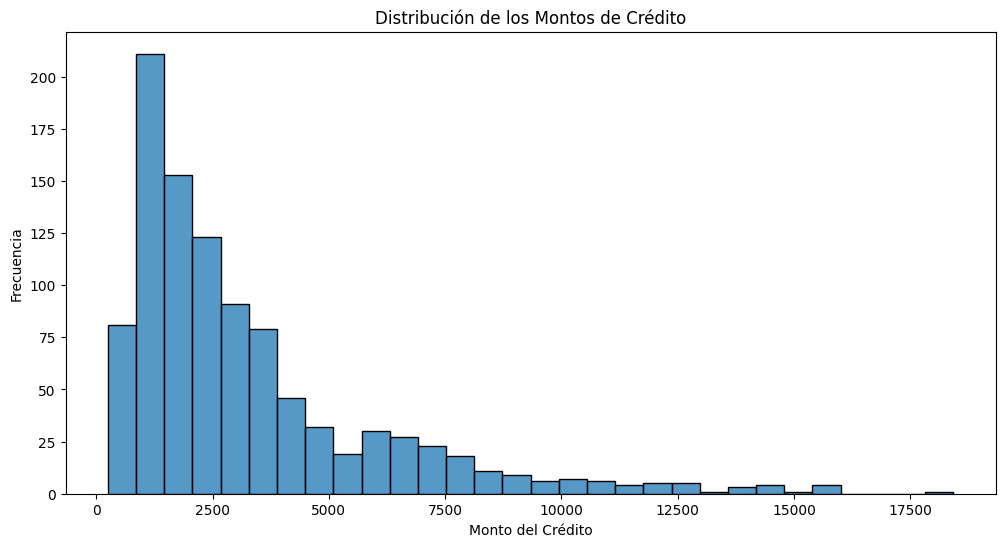

In [8]:
# Histograma para `credit_amount`
plt.figure(figsize=(12, 6))
sns.histplot(df['credit_amount'], bins=30, kde=False)
plt.xlabel('Monto del Crédito')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Montos de Crédito')
plt.show()

La curva del histograma de los creditos está positivamente sesgada, lo que implica que la mayor parte de los creditos el monto es relativamente bajo y hay muy pocos creditos en los que se otorgan valores altos.
Además con el describe vemos que el 75% de los créditos son menores o iguales a 3972.25.

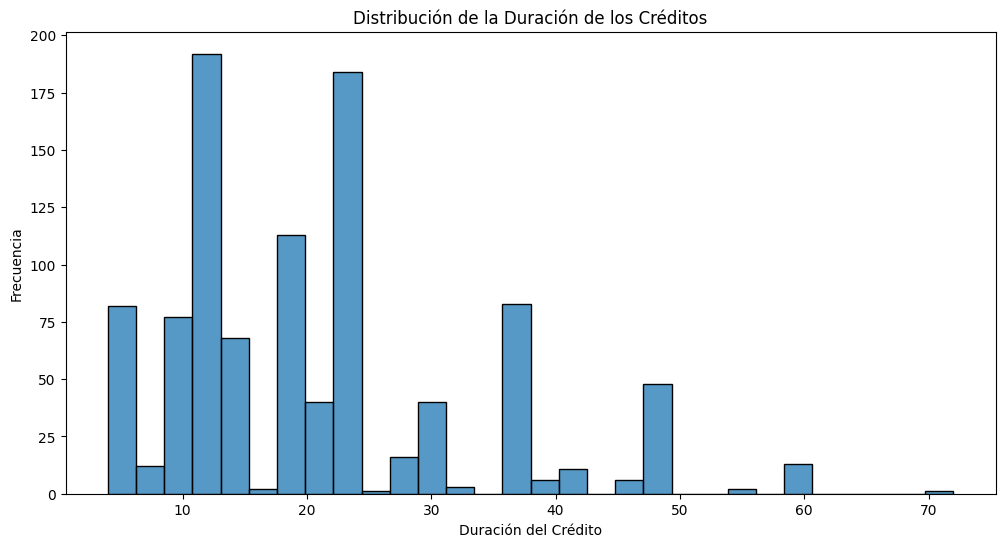

In [9]:
# Histograma para `duration`
plt.figure(figsize=(12, 6))
sns.histplot(df['duration'], bins=30, kde=False)
plt.xlabel('Duración del Crédito')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Duración de los Créditos')
plt.show()

En el histograma de duración del crédito vemos que hay dos picos en el histograma hay dos valores que tienen frecuencias significativamente más altas en comparación con otros intervalos. Con el describe vemos que el 75% de los créditos tienen una duración menor o igual a 24.

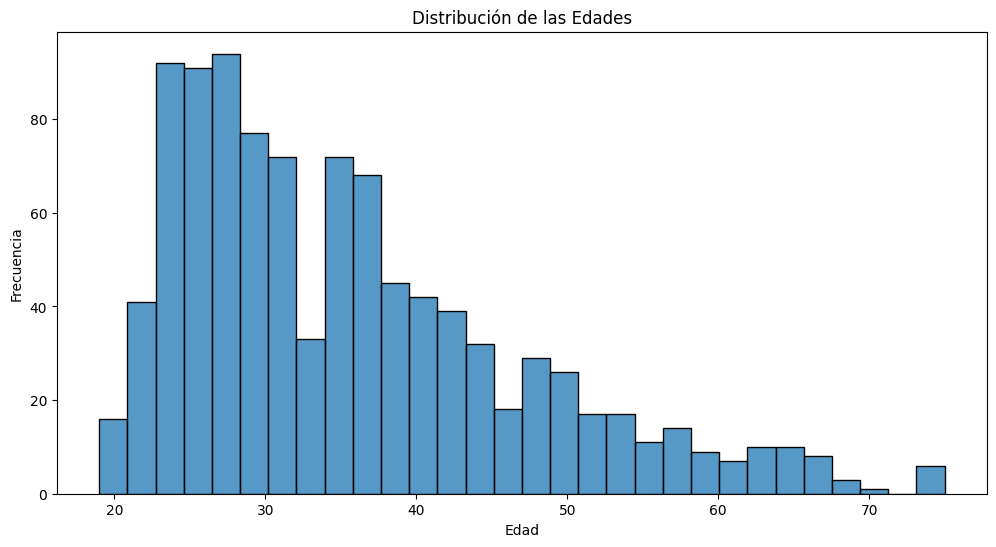

In [10]:
# Histograma para `age`
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=False)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Edades')
plt.show()

En este gráfico tenemos también una curva positivamente sesgada, coincide con lo que vimos en el boxplot y en el describe el 75% de las personas tienen 42 años o menos.

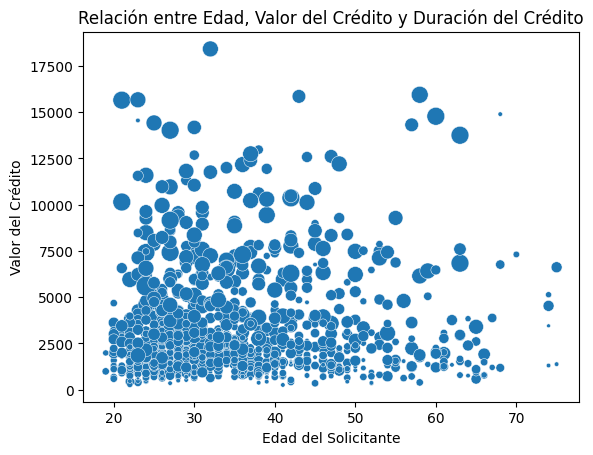

In [11]:
sns.scatterplot(x='age', y='credit_amount', size='duration', sizes=(5, 200), data=df, legend=False)

plt.xlabel('Edad del Solicitante')
plt.ylabel('Valor del Crédito')
plt.title('Relación entre Edad, Valor del Crédito y Duración del Crédito')
plt.show()

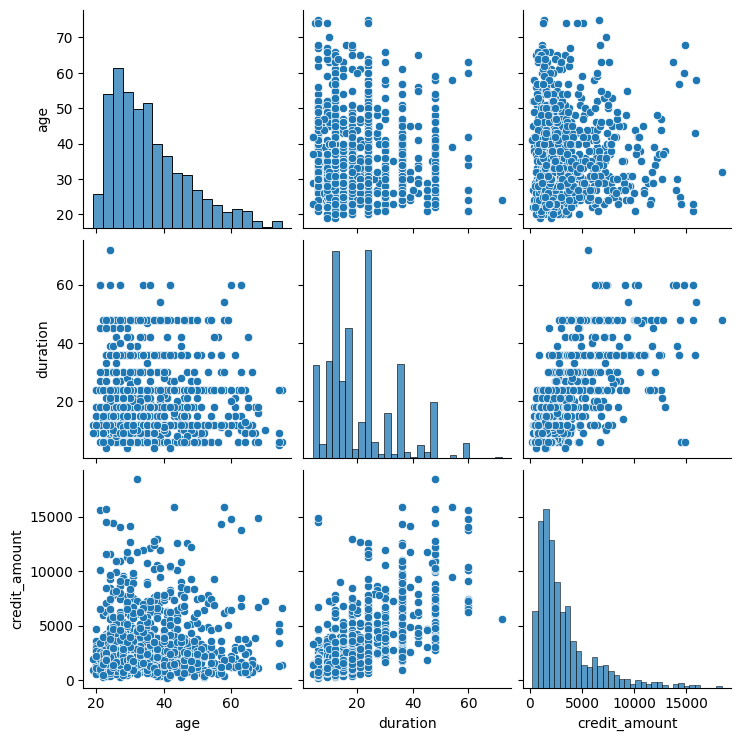

In [19]:
sns.pairplot(df[['age', 'duration', 'credit_amount']])
plt.show()

In [20]:
correlation_matrix = df[['age', 'duration', 'credit_amount']].corr()
print(correlation_matrix)

                    age  duration  credit_amount
age            1.000000 -0.036136       0.032716
duration      -0.036136  1.000000       0.624984
credit_amount  0.032716  0.624984       1.000000


Revisando esa correlación entre mis tres variables más importantes, veo que
la correlación entre  age y duration es muy baja, no hay una relación lineal significativa entre la edad de los solicitantes y la duración del crédito.
Por lo que partí de una hipotesis incorrecta.

Lo mismo pasa para evaluar age y credit_amount donde es de 0.0327.

Ahora bien, veo una correlación bastante más alta (0.6250) entre duration y credit_amount, por lo que voy a estar explorando con regresion lineal la relación entre estos dos.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Selección de características y variable objetivo
X = df[['duration']]
y = df['credit_amount']

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = model_lr.predict(X_test)

# Evaluación del modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regresión Lineal - Mean Squared Error: {mse_lr}")
print(f"Regresión Lineal - R^2 Score: {r2_lr}")


Regresión Lineal - Mean Squared Error: 3899834.3992444435
Regresión Lineal - R^2 Score: 0.3288909360584207


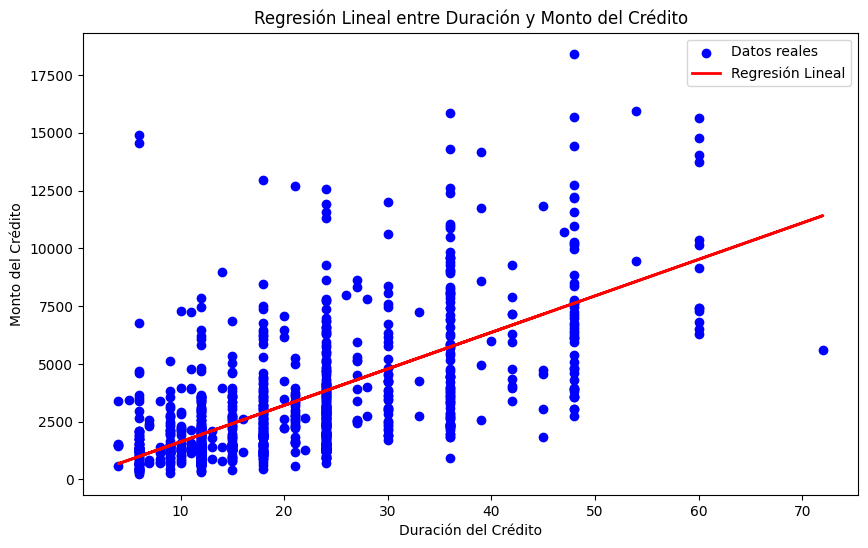

In [27]:
# Predicciones para visualización
df['predicted_credit_amount'] = model_lr.predict(X)

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['credit_amount'], color='blue', label='Datos reales')
plt.plot(df['duration'], df['predicted_credit_amount'], color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('Duración del Crédito')
plt.ylabel('Monto del Crédito')
plt.title('Regresión Lineal entre Duración y Monto del Crédito')
plt.legend()
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Selección de características y variable objetivo
X = df[['age', 'duration', 'existing_credits']]
y = df['credit_amount']

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = model_lr.predict(X_test)

# Evaluación del modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regresión Lineal con 'age', 'duration', y 'existing_credits' - Mean Squared Error: {mse_lr}")
print(f"Regresión Lineal con 'age', 'duration', y 'existing_credits' - R^2 Score: {r2_lr}")


Regresión Lineal con 'age', 'duration', y 'existing_credits' - Mean Squared Error: 3882618.423062997
Regresión Lineal con 'age', 'duration', y 'existing_credits' - R^2 Score: 0.33185357407766825


In [31]:
#sumamos codificación de one-hot para usar job que es una variable categórica

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Codificar la variable categórica 'job' usando one-hot encoding
df_encoded = pd.get_dummies(df, columns=['job'], drop_first=True)

# Selección de características y variable objetivo
X = df_encoded[['age', 'duration', 'existing_credits'] + [col for col in df_encoded if col.startswith('job_')]]
y = df_encoded['credit_amount']

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = model_lr.predict(X_test)

# Evaluación del modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regresión Lineal con 'age', 'duration', 'existing_credits' y 'job' - Mean Squared Error: {mse_lr}")
print(f"Regresión Lineal con 'age', 'duration', 'existing_credits' y 'job' - R^2 Score: {r2_lr}")


Regresión Lineal con 'age', 'duration', 'existing_credits' y 'job' - Mean Squared Error: 3703426.2151204604
Regresión Lineal con 'age', 'duration', 'existing_credits' y 'job' - R^2 Score: 0.36269014369232666


In [36]:
# Imprimir los coeficientes y la intersección del modelo
print("Coeficientes:", model_lr.coef_)
print("Intersección:", model_lr.intercept_)

Coeficientes: [    3.62707187   149.24507633   165.39877065 -1951.54642651
 -1282.61654741 -1959.72042715]
Intersección: 1489.4373976036713
